<a href="https://colab.research.google.com/github/PMartey/DataJourney/blob/main/Stock_Index_LSTM_Network_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project involves accessing either yahoo.com or other stock index resources and pulling up and studying the stock index dataset available.  Then training your RNN model on this dataset and making a prediction about whether the stock will rise or fall over the next day or week.  You might also look at predicting a value.

We will be using **Uber Technologies, Inc.** for this project

Data will range from: 05/10/2019 to 11/13/2023

Using Daily closing prices.

Link to data : "https://finance.yahoo.com/quote/UBER/history?p=UBER"

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fix the random seed for reproductivity


In [ ]:
tf.random.set_seed(7)

# Load dataset as Pandas Dataframe
and then extract the NumPy array from the data frame

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Stock market 11-23/UBER.csv', usecols= [4], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset with MinMas=xScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

761 376


# Convert an array of values into a dataset matrix

In [ ]:
from keras.api._v2.keras import datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X = t and Y = t+1
To prepare the train and test datasets


In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Reshape input again to be [Samples, time steps, features].


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
759/759 - 4s - loss: 0.0635 - 4s/epoch - 5ms/step
Epoch 2/100
759/759 - 2s - loss: 0.0133 - 2s/epoch - 2ms/step
Epoch 3/100
759/759 - 2s - loss: 0.0044 - 2s/epoch - 3ms/step
Epoch 4/100
759/759 - 2s - loss: 9.5534e-04 - 2s/epoch - 3ms/step
Epoch 5/100
759/759 - 2s - loss: 7.7448e-04 - 2s/epoch - 3ms/step
Epoch 6/100
759/759 - 2s - loss: 7.6500e-04 - 2s/epoch - 3ms/step
Epoch 7/100
759/759 - 1s - loss: 7.8897e-04 - 1s/epoch - 2ms/step
Epoch 8/100
759/759 - 2s - loss: 7.9974e-04 - 2s/epoch - 2ms/step
Epoch 9/100
759/759 - 1s - loss: 7.6731e-04 - 1s/epoch - 2ms/step
Epoch 10/100
759/759 - 2s - loss: 7.8923e-04 - 2s/epoch - 2ms/step
Epoch 11/100
759/759 - 2s - loss: 7.9738e-04 - 2s/epoch - 2ms/step
Epoch 12/100
759/759 - 2s - loss: 7.9245e-04 - 2s/epoch - 2ms/step
Epoch 13/100
759/759 - 2s - loss: 7.9606e-04 - 2s/epoch - 3ms/step
Epoch 14/100
759/759 - 3s - loss: 7.9068e-04 - 3s/epoch - 3ms/step
Epoch 15/100
759/759 - 3s - loss: 7.8120e-04 - 3s/epoch - 3ms/step
Epoch 16/100
759

# Estimate the RSME of Prediction using LSTM network

In [ ]:
# Make Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Invert Predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculate Root Mean Squared Error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


12/12 [==============================] - 0s 2ms/step
Train Score: 1.32 RMSE
Test Score: 1.00 RMSE


# Align Predictions and Plot


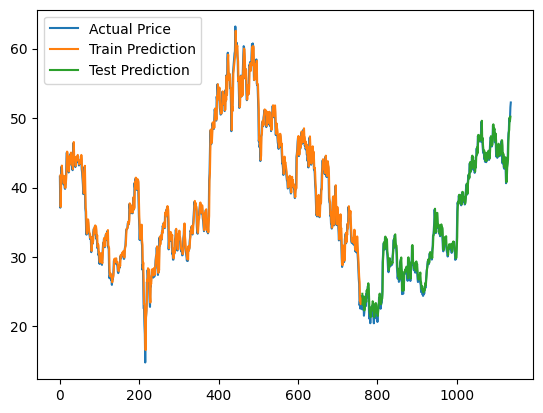

<Figure size 22500x22500 with 0 Axes>

In [ ]:
#Shift Train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#Shift Test Predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.plot.title('UBER Stock Price Prediction')
#plt.set_xlabel('Time')
#plt.set_ylabel('UBER Stock Price')
plt.legend(['Actual Price', 'Train Prediction', 'Test Prediction'], loc='upper left')
plt.figure(figsize=(225, 225))
plt.show()

#!jupyter nbconvert --to html Stock Index LSTM Network for Regression.ipynb

In [ ]:
!jupyter nbconvert --to html Stock_Index_LSTM_Network_for_Regression.ipynb

[NbConvertApp] Converting notebook Stock_Index_LSTM_Network_for_Regression.ipynb to html
[NbConvertApp] Writing 671271 bytes to Stock_Index_LSTM_Network_for_Regression.html
